# Text Data Preprocessing From Scratch ✨

### Nama : Bagus Cipta Pratama
### NIM : 23/516539/PA/22097

---

**to do : Buatlah fungsi untuk melakukan preprocessing dan ekstraksi ciri TF-ID pada data teks tanpa menggunakan library. Kerjakan menggunakan bahasa python**

Asumsi menurut pak wahyono adalah untuk stopword removal bisa disesuaikan dengan konteks teks yang ingin dilakukan preprocessing

---

## Membuat Fungsi Preprocessing dan TF-IDF

seperti yang sudah kita pelajari di kelas , tahapan preprocessing yang dilakukan adalah sebagai berikut 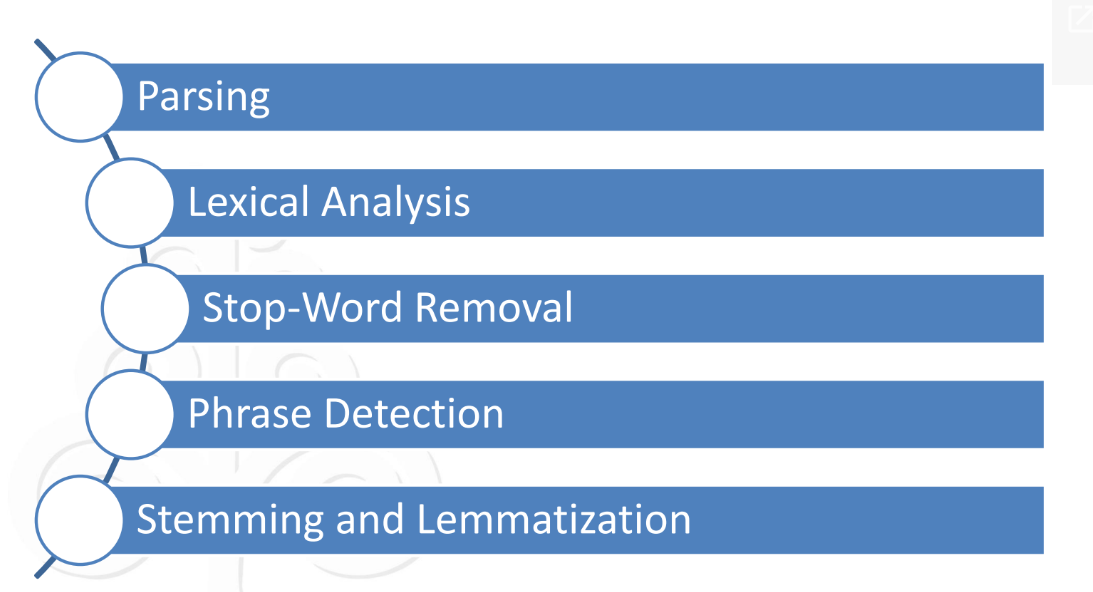

maka kita akan mendefinisikan suatu fungsi yang melakukan proses tersebut secara berturut turut

disini saya menggunakan cara untuk menuliskan dokumen dalam bentuk .py agar bisa digunakan secara terpisah namun tentunya harus kita import untuk bisa digunakan

## Define the documents

In [75]:
%%writefile documents.py
# documents.py
documents = [
    """The United States and China continue to engage in a complex geopolitical rivalry,
    with trade policies, military presence, and diplomatic efforts shaping their relationship.
    Recent discussions between American and Chinese leaders have focused on economic cooperation,
    climate change commitments, and tensions over Taiwan. The Biden administration has sought
    to balance competition with strategic engagement, while China's leadership emphasizes sovereignty
    and non-interference in domestic affairs.""",

    """China's economic policies and America's stance on international trade have created
    both opportunities and conflicts in the global market. The imposition of tariffs,
    restrictions on technology exports, and debates over intellectual property rights
    continue to be key issues. Meanwhile, both nations seek to strengthen alliances
    in the Indo-Pacific region, leading to shifting power dynamics that impact global stability."""
]


Overwriting documents.py


## Fungsi Preprocessing

In [76]:
%%writefile preprocessing.py
# preprocessing.py

def preprocessing(documents):

    # Disini saya mendefinisikan tanda baca yang saya dapatkan dari internet
    # dan mendefinisikan stopwords apa saja yang saya pakai untuk remove

    tanda_baca = '!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`¨°§©®™…–—±€£¥¶×÷'
    stop_words = [
    'the', 'is', 'and', 'to', 'a', 'in', 'that', 'it', 'with', 'as', 'for',
    'on', 'was', 'by', 'at', 'an', 'be', 'this', 'from', 'or', 'have', 'more',
    'not', 'but', 'if', 'they', 'are', 'which', 'when', 'where', 'who', 'what',
    'why', 'how', 'will', 'can', 'would', 'could', 'should', 'about', 'after',
    'before', 'so', 'into', 'its', 'than', 'also', 'other', 'such', 'said', 'says',
    'of', 'all', 'he', 'had', 'both', 'only', 'because', 'them',
    'their', 'while', 'over', 'between', 's', 'meanwhile','has']


    processed_docs = []
    for doc in documents:
        # lowercase
        doc = doc.lower()

        # Ganti tanda baca dengan spasi
        for char in tanda_baca:
            doc = doc.replace(char, ' ')

        # Tokenisasi
        tokens = [word for word in doc.split() if word]

        # Hapus stopword
        tokens = [word for word in tokens if word not in stop_words]
        processed_docs.append(tokens)

    # Phrase Detection dengan bigram
    bigram_counts = {}
    for tokens in processed_docs:
        for i in range(len(tokens) - 1):
            bigram = (tokens[i], tokens[i + 1])
            bigram_counts[bigram] = bigram_counts.get(bigram, 0) + 1

    # Pilih bigram yang muncul minimal 2 kali
    frequent_bigrams = [bigram for bigram, count in bigram_counts.items() if count >= 2]

    # mengganti bigram menjadi token frasa
    def replace_bigrams(tokens, frequent_bigrams):
        i = 0
        new_tokens = []
        while i < len(tokens):
            if i < len(tokens) - 1 and (tokens[i], tokens[i + 1]) in frequent_bigrams:
                new_tokens.append(tokens[i] + '_' + tokens[i + 1])
                i += 2
            else:
                new_tokens.append(tokens[i])
                i += 1
        return new_tokens

    # stemming
    def simple_stem(word):
        if word.endswith('ing'):
            return word[:-3]
        elif word.endswith('ed'):
            return word[:-2]
        # Hanya hapus akhiran 's' jika panjang kata lebih dari 1
        elif word.endswith('s') and len(word) > 1:
            return word[:-1]
        else:
            return word

    final_docs = []
    for tokens in processed_docs:
        # menerapkan phrase detection
        tokens_with_phrases = replace_bigrams(tokens, frequent_bigrams)
        # Lakukan stemming pada token yang bukan merupakan frasa (tidak mengandung '_')
        stemmed_tokens = [simple_stem(token) if '_' not in token else token for token in tokens_with_phrases]
        final_docs.append(stemmed_tokens)

    return final_docs


Overwriting preprocessing.py


## Fungsi TF-IDF

**fungsi IDF yang sudah diajarkan oleh pak wahyono karena ada perbedaan di beberapa paper kemarin**

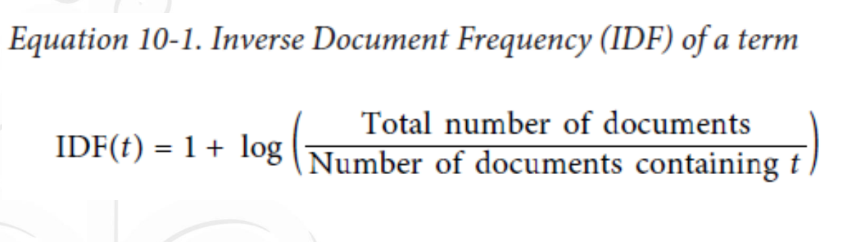

In [77]:
%%writefile tfidf.py
# tfidf.py
import math

def compute_tfidf(preprocessed_docs):
    # Bangun vocabulary
    vocabulary = set()
    for tokens in preprocessed_docs:
        vocabulary.update(tokens)
    vocabulary = list(vocabulary)

    # Hitung Document Frequency
    df = {}
    for token in vocabulary:
        df[token] = sum(1 for doc in preprocessed_docs if token in doc)

    # Hitung Inverse Document Frequency (IDF):
    # IDF(t) = 1 + log(N / df[t])
    N = len(preprocessed_docs)
    idf = {token: 1 + math.log(N / df[token]) for token in df}

    # Hitung TF-IDF untuk setiap dokumen
    tfidf_vectors = []
    for tokens in preprocessed_docs:
        # Hitung Term Frequency (TF)
        tf = {}
        for token in tokens:
            tf[token] = tf.get(token, 0) + 1

        # Normalisasi TF berdasarkan jumlah token, kemudian kalikan dengan IDF
        tfidf = {}
        for token in vocabulary:
            # Jika token tidak muncul di dokumen, TF otomatis 0
            token_tf = tf.get(token, 0) / len(tokens)
            token_idf = idf[token]
            tfidf[token] = token_tf * token_idf

        tfidf_vectors.append(tfidf)

    return tfidf_vectors

Overwriting tfidf.py


## Eksekusi

In [78]:
%%writefile main.py
# main.py
from documents import documents
from preprocessing import preprocessing
from tfidf import compute_tfidf

if __name__ == '__main__':
    preprocessed_docs = preprocessing(documents)

    print("Hasil Preprocessing:")
    for i, tokens in enumerate(preprocessed_docs):
        for j in range(0, len(tokens), 10):
            print(", ".join(tokens[j:j+10]))
        print("-" * 100)

    # Eksekusi perhitungan TF-IDF
    tfidf_vectors = compute_tfidf(preprocessed_docs)

    print("\nVektor TF-IDF:")
    for i, tfidf in enumerate(tfidf_vectors):

        # Filter hanya token dengan nilai TF-IDF > 0
        tfidf_filtered = {token: value for token, value in tfidf.items() if value > 0}

        if tfidf_filtered:
            tfidf_items = [f"{token}: {value:.6f}" for token, value in tfidf_filtered.items()]
            for j in range(0, len(tfidf_items), 5):
                print(", ".join(tfidf_items[j:j+5]))
        else:
            print("Tidak ada kata dengan nilai TF-IDF di atas 0.")

        print("-" * 100)


Overwriting main.py


## Hasil dan Output

In [79]:
!python main.py

Hasil Preprocessing:
unit, state, china, continue, engage, complex, geopolitical, rivalry, trade, policie
military, presence, diplomatic, effort, shap, relationship, recent, discussion, american, chinese
leader, focus, economic, cooperation, climate, change, commitment, tension, taiwan, biden
administration, sought, balance, competition, strategic, engagement, china, leadership, emphasize, sovereignty
non, interference, domestic, affair
----------------------------------------------------------------------------------------------------
china, economic, policie, america, stance, international, trade, creat, opportunitie, conflict
global, market, imposition, tariff, restriction, technology, export, debate, intellectual, property
right, continue, key, issue, nation, seek, strengthen, alliance, indo, pacific
region, lead, shift, power, dynamic, impact, global, stability
----------------------------------------------------------------------------------------------------

Vektor TF-IDF:
enga

---

## Terima kasih! 😊🙏